In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/googleplaystore.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv",encoding='utf-8')

In [4]:
"""
App with large number of reviews
"""
data['Reviews'] = pd.to_numeric(data['Reviews'],errors='coerce')
data.sort_values('Reviews',ascending=False).iloc[0]['App']

'Facebook'

In [5]:
"""
Paid Vs Free
"""
print("Free Apps",len(data[data['Type'] == "Free"]))
print("Paid Apps",len(data[data['Type'] == "Paid"]))



Free Apps 10039
Paid Apps 800


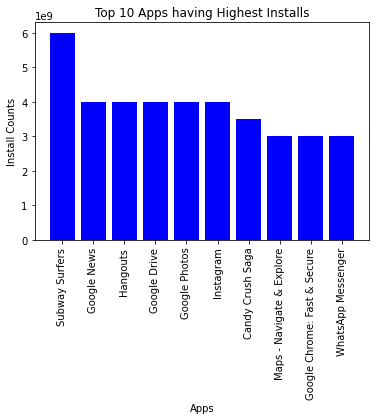

In [6]:
"""
App with the largest number of installs
"""
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = data[data['Category'] == '1.9'].index
data.loc[i]
data = data.drop(i)

data['Installs'] = data['Installs'].astype(int)
res = data.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

In [7]:
"""
App with the largest size
"""
data.sort_values('Size',ascending=False)
# there are 1695 rows having  string "Varies with device"
data.loc[data['Size'] == 'Varies with device'].shape

unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

data.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
data.sort_values('Size', ascending=False).iloc[0]['App']

'Word Search Tab 1 FR'

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0, 0.5, 'Size')

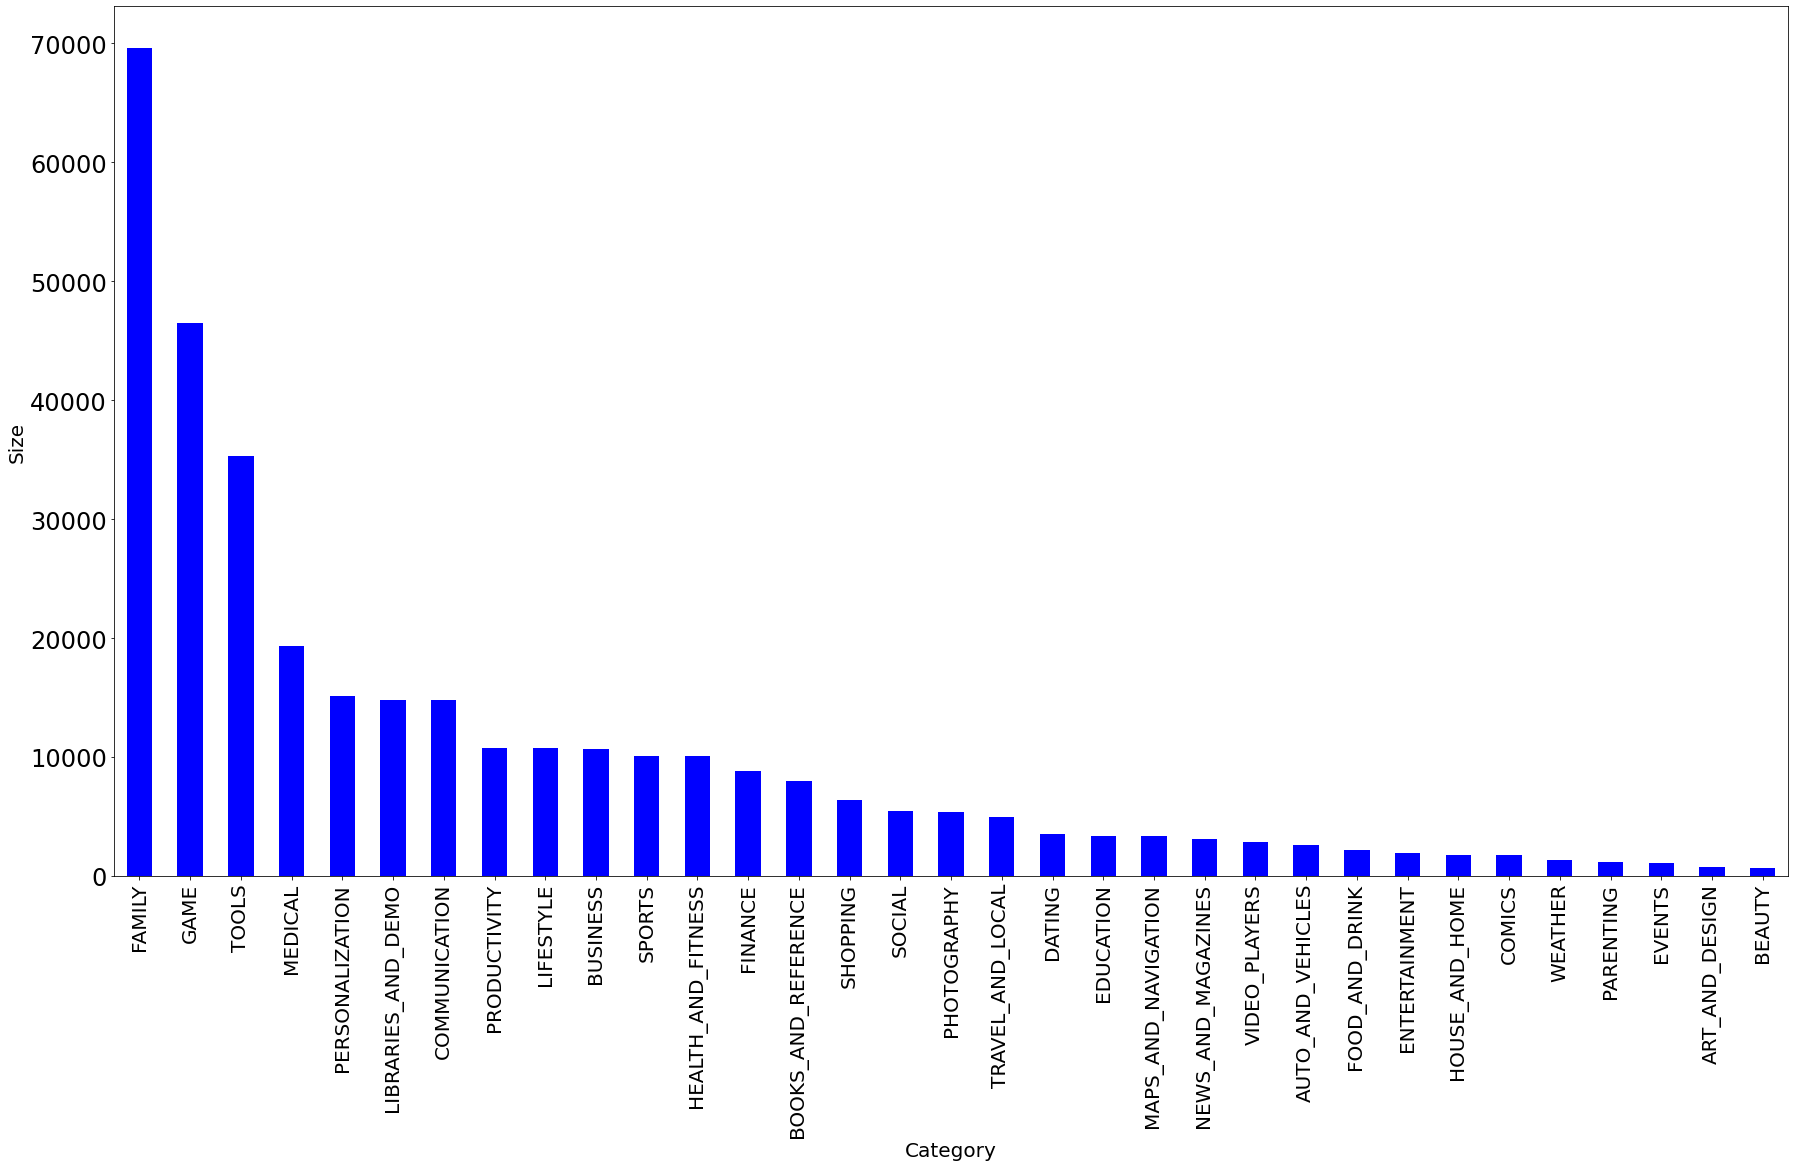

In [8]:
"""
Most Popular Category
"""
data.loc[data['Size'] == 'Varies with device'].shape
unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
res = data.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

In [9]:
"""
Data Visualizataion
"""

def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

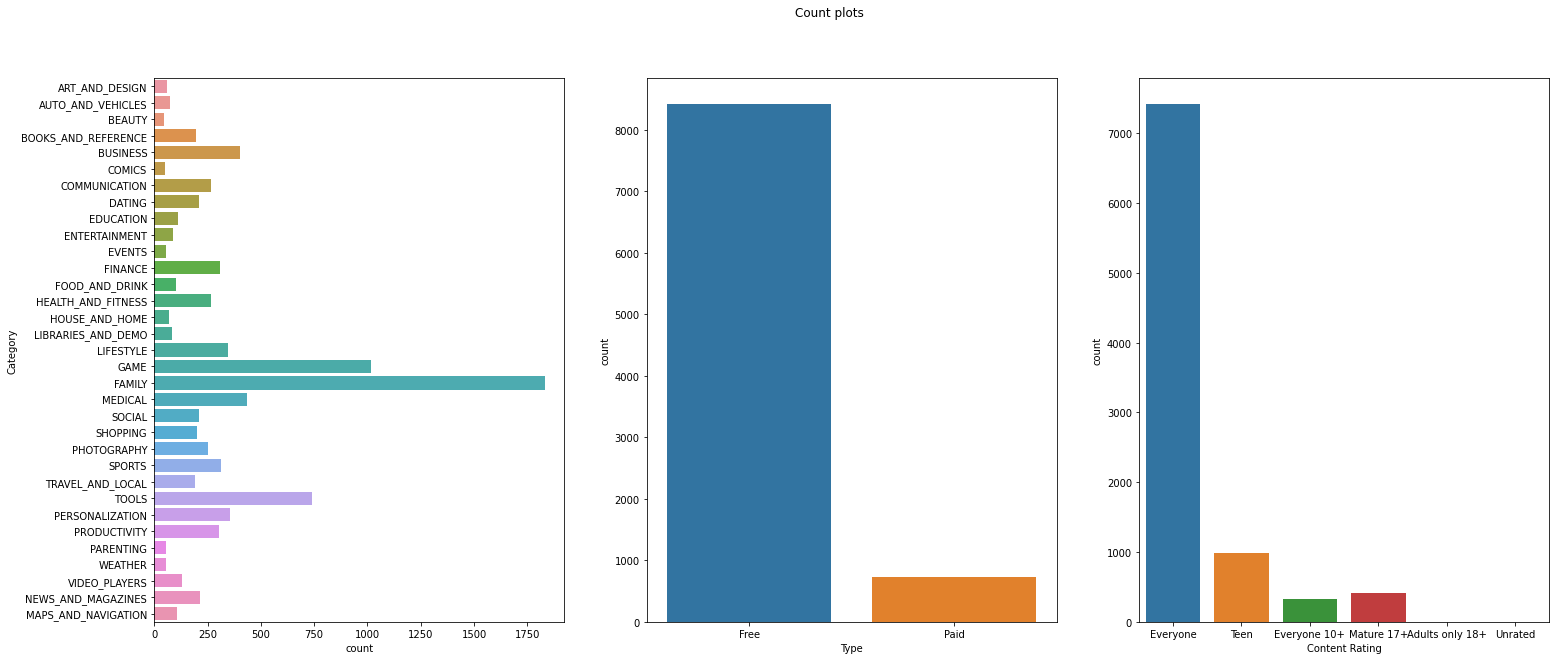

In [10]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=data,ax=ax1)
sns.countplot('Type',data=data,ax=ax2)
sns.countplot('Content Rating',data=data,ax=ax3)
plt.show()

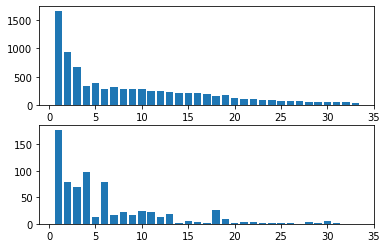

In [11]:
data_filter = data[['Rating', 'Type', 'Category']]
# Describe Rating dataframe
plot_app_types(data_filter)



[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

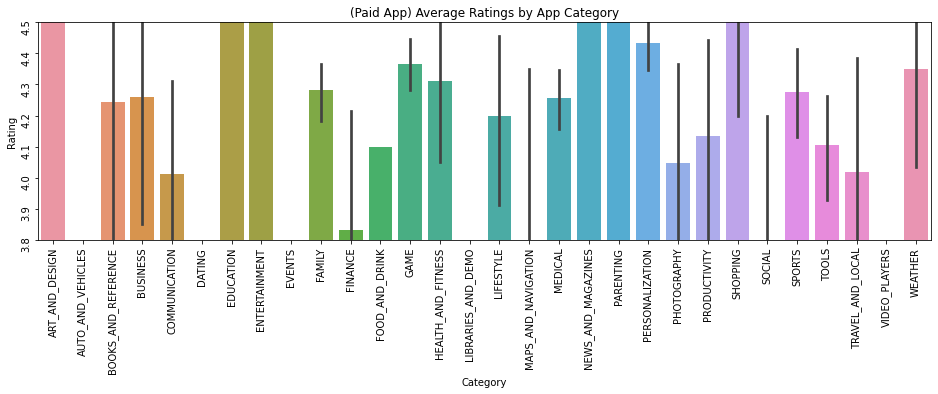

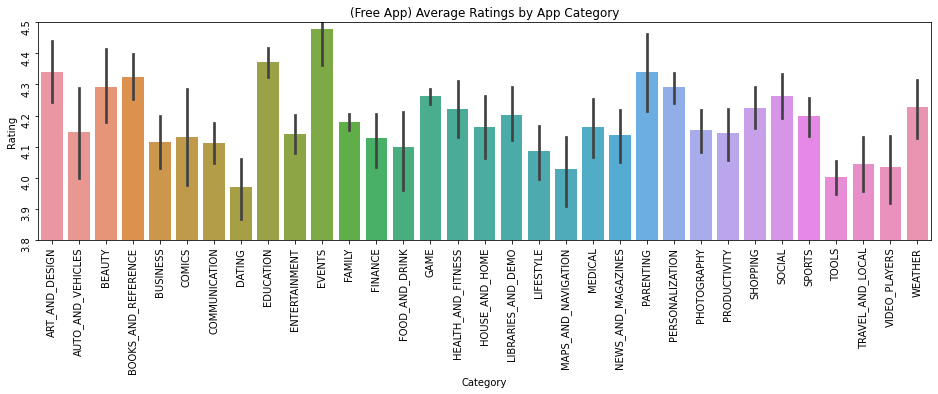

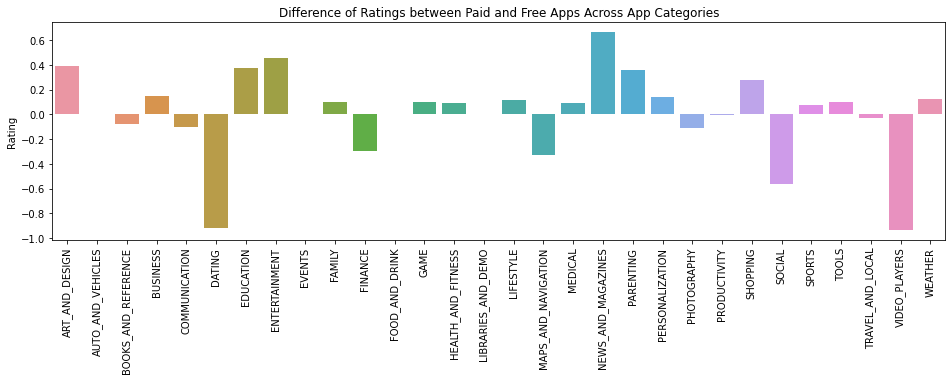

In [12]:
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

